In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import itertools
pd.set_option('max_columns', None)
sns.set_style("white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\DHEEKSHITH NAIDU\\Desktop\\EDA PROJECT\\AuDSJobs.csv")

In [3]:
df.head(10)

,Job Title,Job Location,Company,Url,Estimate Base Salary,Low Estimate,High Estimate,Size,Type,Sector,Founded,Industry,Revenue,Job Descriptions,Rating,Friend Reccomendation,CEO Approval,Number of Rater,Career Opportinities,Compensation and Benefits,Culture and Values,Senior Management,Work Life Balance,Country,State,python_yn,r_yn,sql_yn,java_yn,julia_yn,scala_yn,c_yn,c++_yn,javascript_yn,spark_yn,hadoop_yn,matlab_yn,sas_yn,git_yn,excel_yn,nosql_yn,aws_yn,mongodb_yn,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,Banking & Lending,Unknown / Non-Applicable,-\nBuild a rewarding career in an innovative a...,3.7,71.0,75.0,354.0,3.9,3.7,4.1,3.7,4.0,Australia,Victoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,Biotech & Pharmaceuticals,$10+ billion (USD),"At Bristol Myers Squibb, we are inspired by a ...",3.9,76.0,82.0,1165.0,3.6,3.9,3.8,3.5,3.7,Australia,Victoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,Biotech & Pharmaceuticals,$10+ billion (USD),"At Bristol Myers Squibb, we are inspired by a ...",3.9,76.0,82.0,1165.0,3.6,3.9,3.8,3.5,3.7,Australia,Victoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,https://www.glassdoor.com.au/partner/jobListin...,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,Biotech & Pharmaceuticals,$10+ billion (USD),"At Bristol Myers Squibb, we are inspired by a ...",3.9,76.0,82.0,1165.0,3.6,3.9,3.8,3.5,3.7,Australia,Victoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,Banking & Lending,Unknown / Non-Applicable,About the role\n\nRole Location: Melbourne\n\n...,3.9,80.0,83.0,2339.0,3.9,3.7,4.1,3.7,4.0,Australia,Victoria,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Data Scientist,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,Banking & Lending,Unknown / Non-Applicable,About the role\n\nRole Location: Melbourne\n\n...,4.1,85.0,86.0,1596.0,3.9,3.7,4.1,3.7,4.0,Australia,Victoria,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Clinical Research Assistant,Melbourne,Alfred Health,https://www.glassdoor.com.au/partner/jobListin...,62718,62000,63000,5001 to 10000 Employees,Hospital,Healthcare,1871.0,Healthcare Services & Hospitals,Unknown / Non-Applicable,Alfred Health\nAlfred Health is a leader in he...,4.2,93.0,77.0,28.0,4.0,3.6,4.1,4.0,4.0,Australia,Victoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Data Scientist,Melbourne,ANZ Banking Group,https://www.glassdoor.com.au/partner/jobListin...,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,Banking & Lending,Unknown / Non-Applicable,About the role\n\nRole Location: Melbourne\n\n...,4.1,85.0,86.0,1596.0,3.9,3.7,4.1,3.7,4.0,Australia,Victoria,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Software Engineer,Australia,Indeed,https://www.glassdoor.com.au/partner/jobListin...,212000,173000,251000,5001 to 10000 Employees,Company - Private,Information Technology,2004.0,Internet & Web Services,$2 to $5 billion (USD),Your Job\nThis role is only open to candidates...,4.4,90.0,94.0,1020.0,4.

In [4]:
df.tail(10)

,Job Title,Job Location,Company,Url,Estimate Base Salary,Low Estimate,High Estimate,Size,Type,Sector,Founded,Industry,Revenue,Job Descriptions,Rating,Friend Reccomendation,CEO Approval,Number of Rater,Career Opportinities,Compensation and Benefits,Culture and Values,Senior Management,Work Life Balance,Country,State,python_yn,r_yn,sql_yn,java_yn,julia_yn,scala_yn,c_yn,c++_yn,javascript_yn,spark_yn,hadoop_yn,matlab_yn,sas_yn,git_yn,excel_yn,nosql_yn,aws_yn,mongodb_yn,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
2078,Lead Data Specialist,Perth,Accenture,https://www.glassdoor.com.au/partner/jobListin...,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,Business Consulting,$10+ billion (USD),Do you have your head in the Cloud?\nCombine t...,3.9,76.0,85.0,245.0,4.0,3.4,3.8,3.4,3.2,Australia,Western Australia,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2079,Lead Data Specialist,Perth,Accenture,https://www.glassdoor.com.au/partner/jobListin...,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,Business Consulting,$10+ billion (USD),Do you have your head in the Cloud?\nCombine t...,3.9,76.0,85.0,245.0,4.0,3.4,3.8,3.4,3.2,Australia,Western Australia,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2080,Graduate Metallurgical Engineer,Yalgoo,Silver Lake Resources,https://www.glassdoor.com.au/partner/jobListin...,96825,75000,125000,Unknown,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable,The Deflector Processing Plant produces both G...,2.5,31.0,NaN,0.0,3.2,2.0,2.5,2.2,2.7,Australia,Western Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2081,Graduate Metallurgical Engineer,Yalgoo,Silver Lake Resources,https://www.glassdoor.com.au/partner/jobListin...,96825,75000,125000,Unknown,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable,The Deflector Processing Plant produces both G...,2.5,31.0,NaN,0.0,3.2,2.0,2.5,2.2,2.7,Australia,Western Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2082,Helicopter Pilot,Subiaco,Rocketmine,https://www.glassdoor.com.au/partner/jobListin...,80000,70000,90000,NaN,NaN,NaN,NaN,NaN,NaN,About us\nRocketmine is a division of the ASX-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Western Australia,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2083,Helicopter Pilot,Subiaco,Rocketmine,https://www.glassdoor.com.au/partner/jobListin...,80000,70000,90000,NaN,NaN,NaN,NaN,NaN,NaN,About us\nRocketmine is a division of the ASX-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Western Australia,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2084,Graduate Environmental Specialist,Perth,Lynas Corporation,https://www.glassdoor.com.au/partner/jobListin...,114923,94000,140000,501 to 1000 Employees,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable,At Lynas Rare Earths – we do interesting stuff...,2.9,50.0,NaN,0.0,3.0,2.3,2.4,2.3,2.8,Australia,Western Australia,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2085,Graduate Environmental Specialist,Perth,Lynas Corporation,https://www.glassdoor.com.au/partner/jobListin...,114923,94000,140000,501 to 1000 Employees,Company - Private,NaN,NaN,NaN,Unknown / Non-Applicable,At Lynas Rare Earths – we do interesting stuff...,2.9,50.0,NaN,0.0,3.0,2.3,2.4,2.3,2.8,Australia,Western Australia,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2086,Data Analyst,Jandakot,Schlumberger,https://www.glassdoor.com.au/partner/jobListin...,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,Energy & Utilities,$10+ billion (USD),Field Data Analyst - Geoservices\nJandakot - A...,3.4,58.0,63.0,2190.0,3.8,3.9,3.8,3.4,3.1,Australia,Western Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2087,Data Analyst,Jandakot,Schlumberger,https://www.glassdoor.com.au/partner/jobListin...,135861,108000,171000,10000+ Employees,Company - 

In [5]:
df.describe()

,Estimate Base Salary,Low Estimate,High Estimate,Founded,Rating,Friend Reccomendation,CEO Approval,Number of Rater,Career Opportinities,Compensation and Benefits,Culture and Values,Senior Management,Work Life Balance,python_yn,r_yn,sql_yn,java_yn,julia_yn,scala_yn,c_yn,c++_yn,javascript_yn,spark_yn,hadoop_yn,matlab_yn,sas_yn,git_yn,excel_yn,nosql_yn,aws_yn,mongodb_yn,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
count,2088.000000,2088.000000,2088.000000,1198.000000,1777.000000,1732.000000,1324.000000,1777.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.0,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,102876.283046,91153.256705,116305.076628,1946.622705,3.880191,76.397229,76.795317,1871.593134,3.688079,3.607514,3.862203,3.463842,3.788927,0.367816,0.217433,0.369732,0.083812,0.002395,0.052203,0.018678,0.092912,0.012931,0.065613,0.026341,0.018199,0.018678,0.036398,0.125958,0.003831,0.092912,0.014847,0.000479,0.049330,0.0,0.105364,0.057950,0.058429,0.011494,0.016762,0.211207,0.169061
std,34297.989501,30441.165716,40443.733452,62.768897,0.538047,15.123766,16.748902,4773.469136,0.570887,0.549737,0.572421,0.574936,0.587722,0.482326,0.412598,0.482848,0.277172,0.048888,0.222490,0.135418,0.290378,0.113004,0.247664,0.160186,0.133703,0.135418,0.187324,0.331881,0.061795,0.290378,0.120968,0.021884,0.216607,0.0,0.307095,0.233705,0.234609,0.106619,0.128411,0.408263,0.374896
min,46133.000000,30000.000000,50000.000000,1631.000000,1.600000,15.000000,7.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80000.000000,70000.000000,87000.000000,1899.000000,3.700000,68.000000,70.000000,2.000000,3.400000,3.400000,3.500000,3.100000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,96021.000000,85000.000000,111000.000000,1968.000000,3.900000,79.000000,81.500000,52.000000,3.700000,3.600000,3.900000,3.500000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120000.000000,107000.000000,140000.000000,2004.000000,4.100000,86.250000,87.000000,1020.000000,4.000000,3.900000,4.100000,3.700000,4.100000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,295000.000000,241000.000000,349000.000000,2020.000000,5.000000,100.000000,100.000000,30783.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Job Title                  2085 non-null   object 
 1   Job Location               2088 non-null   object 
 2   Company                    2088 non-null   object 
 3   Url                        2088 non-null   object 
 4   Estimate Base Salary       2088 non-null   int64  
 5   Low Estimate               2088 non-null   int64  
 6   High Estimate              2088 non-null   int64  
 7   Size                       1907 non-null   object 
 8   Type                       1907 non-null   object 
 9   Sector                     1521 non-null   object 
 10  Founded                    1198 non-null   float64
 11  Industry                   1521 non-null   object 
 12  Revenue                    1907 non-null   object 
 13  Job Descriptions           2088 non-null   objec

In [7]:
df.shape

(2088, 53)

In [8]:
df.isnull()

,Job Title,Job Location,Company,Url,Estimate Base Salary,Low Estimate,High Estimate,Size,Type,Sector,Founded,Industry,Revenue,Job Descriptions,Rating,Friend Reccomendation,CEO Approval,Number of Rater,Career Opportinities,Compensation and Benefits,Culture and Values,Senior Management,Work Life Balance,Country,State,python_yn,r_yn,sql_yn,java_yn,julia_yn,scala_yn,c_yn,c++_yn,javascript_yn,spark_yn,hadoop_yn,matlab_yn,sas_yn,git_yn,excel_yn,nosql_yn,aws_yn,mongodb_yn,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2084,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2085,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2086,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Data Cleaning & Handling**

In [9]:
df.isnull().sum()

Job Title                      3
Job Location                   0
Company                        0
Url                            0
Estimate Base Salary           0
Low Estimate                   0
High Estimate                  0
Size                         181
Type                         181
Sector                       567
Founded                      890
Industry                     567
Revenue                      181
Job Descriptions               0
Rating                       311
Friend Reccomendation        356
CEO Approval                 764
Number of Rater              311
Career Opportinities         318
Compensation and Benefits    318
Culture and Values           318
Senior Management            318
Work Life Balance            318
Country                        0
State                          0
python_yn                      0
r_yn                           0
sql_yn                         0
java_yn                        0
julia_yn                       0
scala_yn  

In [10]:
df.Size.isnull().sum()

181

In [11]:
df.shape

(2088, 53)

In [12]:
float(100.0*181/1907)

9.491347666491873

In [13]:
df1= df[-df.Size.isnull()].copy()
df1.shape

(1907, 53)

In [14]:
df1.Sector.isnull().sum()

386

In [15]:
df1.Founded.isnull().sum()

709

In [16]:
df=df.sort_values('Size')

In [17]:
df.Size.describe()

count                 1907
unique                   8
top       10000+ Employees
freq                   538
Name: Size, dtype: object

In [18]:
df.Founded.describe()

count    1198.000000
mean     1946.622705
std        62.768897
min      1631.000000
25%      1899.000000
50%      1968.000000
75%      2004.000000
max      2020.000000
Name: Founded, dtype: float64

In [19]:
df.Sector.describe()

count        1521
unique         24
top       Finance
freq          299
Name: Sector, dtype: object

**Univariate Analysis**

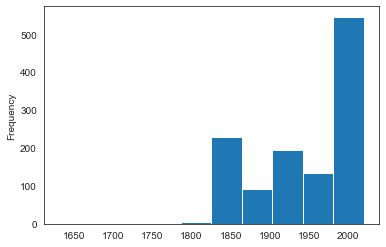

In [20]:
df.Founded.plot.hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

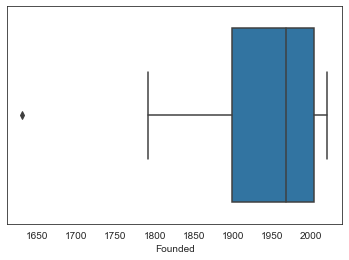

In [21]:
sns.boxplot(df.Founded)
plt.show

In [22]:
df['Size'].value_counts().head()

10000+ Employees           538
1001 to 5000 Employees     372
5001 to 10000 Employees    302
1 to 50 Employees          189
501 to 1000 Employees      170
Name: Size, dtype: int64

In [23]:
df['Founded'].value_counts()

1850.0    139
2015.0     88
1926.0     84
2009.0     72
2004.0     60
         ... 
1837.0      1
1969.0      1
1973.0      1
1903.0      1
2002.0      1
Name: Founded, Length: 92, dtype: int64

In [24]:
df['Sector'].value_counts()

Finance                                        299
Information Technology                         234
Government & Public Administration             140
Education                                      109
Management & Consulting                         99
Pharmaceutical & Biotechnology                  84
Manufacturing                                   76
Human Resources & Staffing                      71
Media & Communication                           63
Retail & Wholesale                              56
Healthcare                                      49
Energy, Mining, Utilities                       43
Construction, Repair & Maintenance Services     43
Non-profit & NGO                                42
Arts, Entertainment & Recreation                27
Insurance                                       21
Telecommunications                              20
Transportation & Logistics                      15
Restaurants & Food Service                       9
Real Estate                    

<AxesSubplot:title={'center':'Distribution Plot'}, xlabel='Founded', ylabel='Density'>

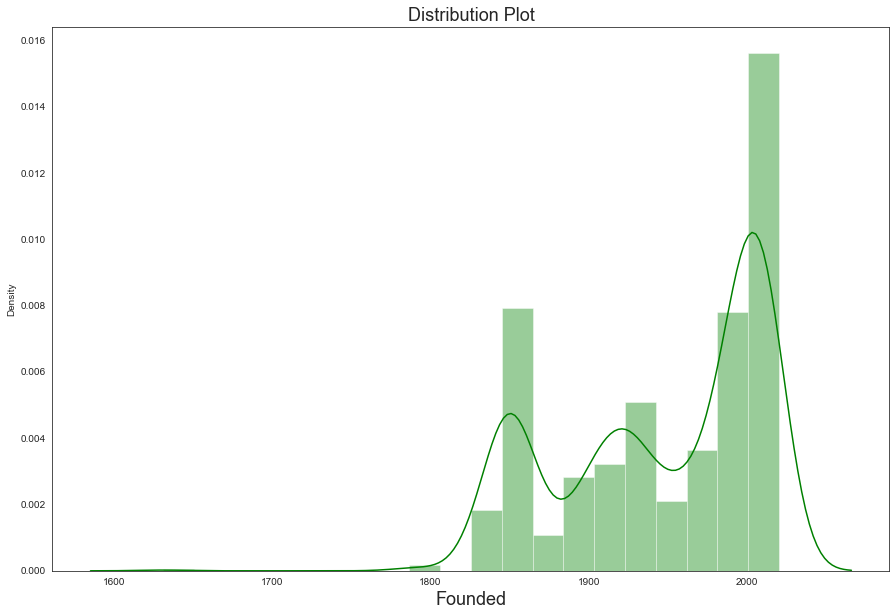

In [25]:
Founded = df['Founded']
plt.figure(figsize=(15,10))
plt.title('Distribution Plot', fontsize=18)
plt.xlabel('xlabel',fontsize=18)
sns.distplot(df['Founded'] , color='g')

**box plot**

<AxesSubplot:title={'center':'Box Plot'}, xlabel='Founded'>

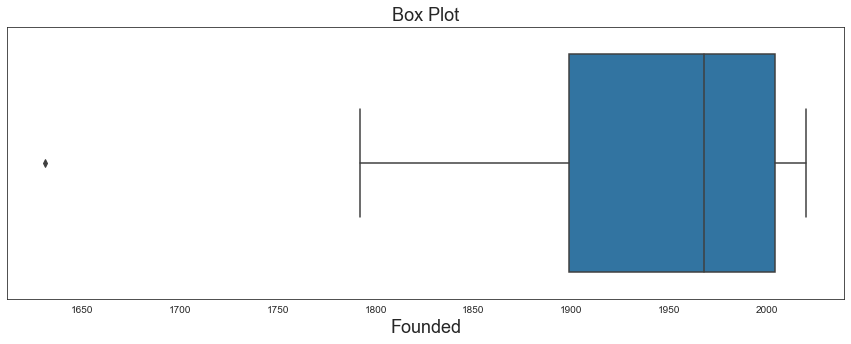

In [26]:
plt.figure(figsize=(15, 5))
plt.title('Box Plot', fontsize=18)
plt.xlabel('xlabel',fontsize=18)
sns.boxplot(df['Founded'])

<AxesSubplot:title={'center':'Count Plot'}, xlabel='Revenue', ylabel='count'>

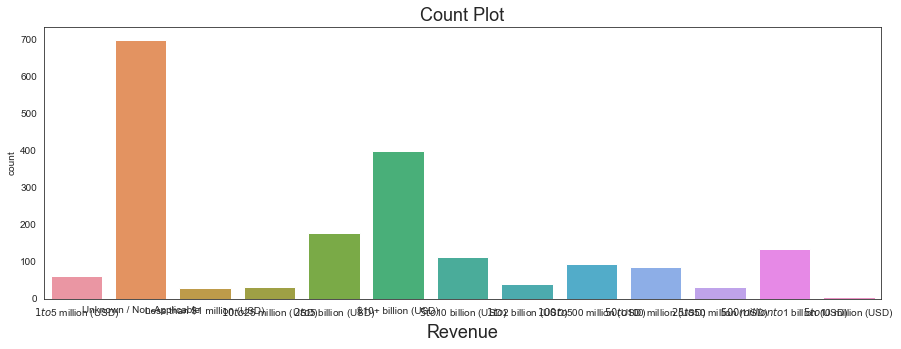

In [27]:
Revenue = df['Revenue']
Revenue.dropna(inplace = True)
plt.figure(figsize=(15, 5))
plt.title('Count Plot', fontsize=18)
plt.xlabel('xlabel',fontsize=18)
sns.countplot(df['Revenue'])

<AxesSubplot:title={'center':'Count Plot (Revenue)'}, xlabel='Revenue', ylabel='count'>

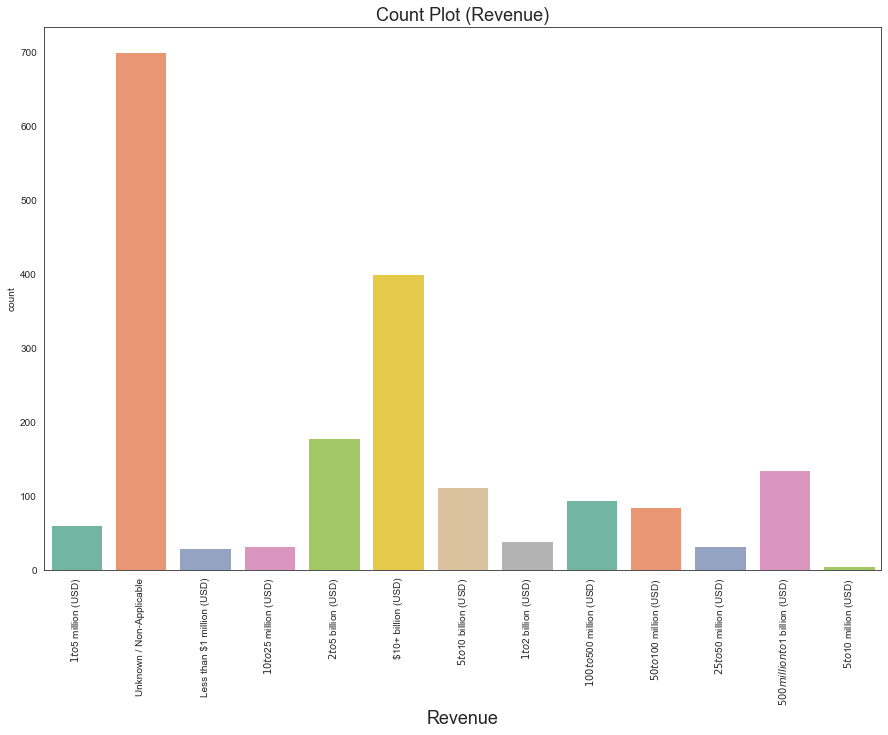

In [28]:
plt.figure(figsize = (15,10))
plt.title('Count Plot (Revenue)', fontsize=18)
plt.xticks(rotation = (90))
plt.xlabel('xlabel',fontsize=18)
sns.countplot(df['Revenue'], palette="Set2")

**COUNT PLOTS**

COUNT PLOTS METHOD IS USED TO SHOW THE COUNTS OF OBSERVATION IN EACH CATEGORICAL BIN USING BARS. COUNTPLOTS ARE USED BY SEABORN.

**DENSITY PLOTS**

DENSITY PLOTS IS A TYPE OF DATA VISUALIZATION TOOL. IT IS A VARIATION OF THE HISTOGRAM THAT USES 'KERNEL SMOOTHING' WHILE PLOTTING THE VALUES. "KERNEL SMOOTHING" CAN REVEAL AND PERSERVE STRUCTURAL FEATURES OF A "PROBABILITY DENSITY FUNCTION" THAT A PARAMETRIC ESTIMATE WOULD OBSCURE.

IN THE BELOW ANALYSIS I USED THE DENSITY FUNCTION FOR "SITE_REVIEW_RATING","SITE_REVIEW_COUNT","ROOM COUNT" AND COUNTPLOT IS USED FOR "HOTEL_STAR_RATING

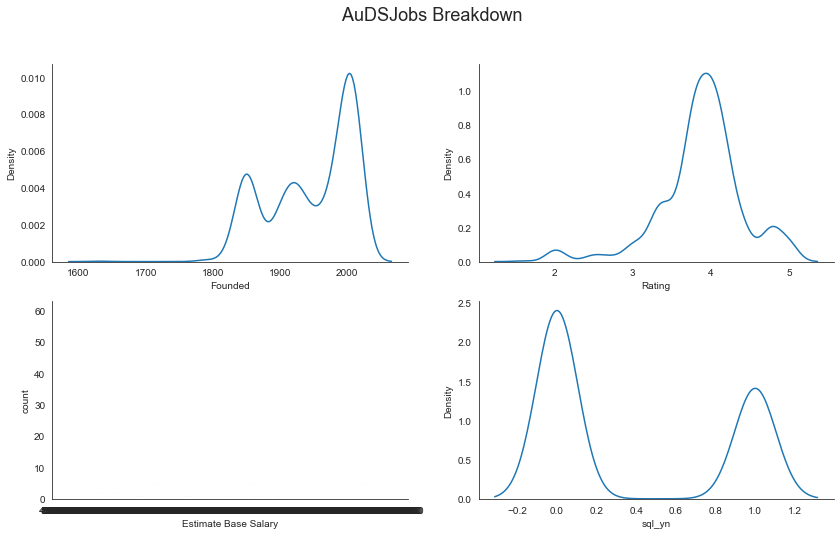

In [29]:

f, axarr = plt.subplots(2, 2, figsize=(14, 8))
plt.suptitle(' AuDSJobs Breakdown', fontsize=18)

sns.kdeplot(df['Founded'], ax=axarr[0][0])
sns.kdeplot(df['Rating'], ax=axarr[0][1])
sns.countplot(df['Estimate Base Salary'], ax=axarr[1][0])
sns.kdeplot(df['sql_yn'], ax=axarr[1][1])

sns.despine()

**BIVARIATE ANALYSIS**

In [30]:
df.iloc[df['python_yn'].argmax()]['Job Descriptions']

'APRA is seeking experienced and enthusiastic Data Scientists to join the Innovation Lab team within our Cross-Industry Insights and Data Division. These roles will require you to leverage your R and / or Python skills and experience of Machine Learning and Natural Language Processing to deliver Innovative solutions aimed at drawing Insight out of the structured and unstructured data that APRA receives.\n\nAPRA collects data from more than 4500 regulated entities including banks, insurers and superannuation funds as part of its mandate of protecting the Australian community. As well as deeper and broader policy driven regulatory collections APRA is increasingly using alternate data sources including fast-moving publicly available data as part of the mix to allow us further insight into Australian financial entities.\n\nKey Challenges:\nEnhancing APRA’s data science capabilities and facilitating exploration of data and business problems\nChallenging accepted practices in order to transf

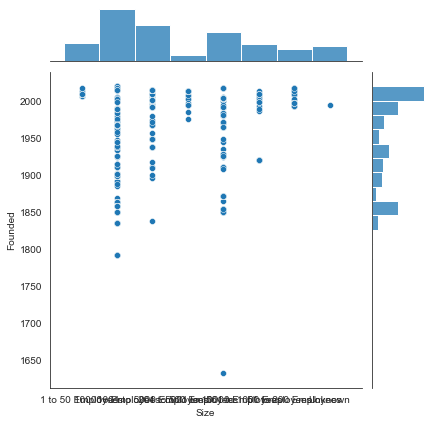

In [31]:
sns.jointplot(df.Size , df.Founded)

In [32]:
import itertools

top_Workarea = pd.Series(
    list(itertools.chain(*df['Sector']\
                             .fillna("")\
                             .map(lambda f: [am.strip() for am in f.split("|")])\
                             .values\
                             .tolist()))).value_counts().head(12).index.values
temp = df.assign(Workarea=df['Sector'].fillna("").map(
        lambda f: [am.strip() for am in f.split("|")]))

for amenity in top_Workarea:
    temp[amenity] = temp.Workarea.map(lambda l: amenity in l)

In [33]:
top_Workarea

array(['', 'Finance', 'Information Technology',
       'Government & Public Administration', 'Education',
       'Management & Consulting', 'Pharmaceutical & Biotechnology',
       'Manufacturing', 'Human Resources & Staffing',
       'Media & Communication', 'Retail & Wholesale', 'Healthcare'],
      dtype=object)

**Categorical data analysis**
Here we use factorplot to represent the Finance sector among the Secytors category
Factor plot: It used to draw a different types of categorical plots.


Text(0.5, 1.0, 'Finance?')

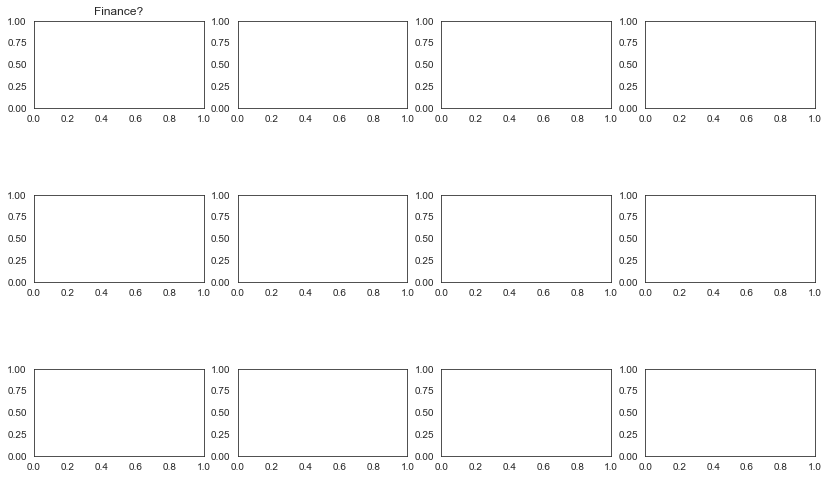

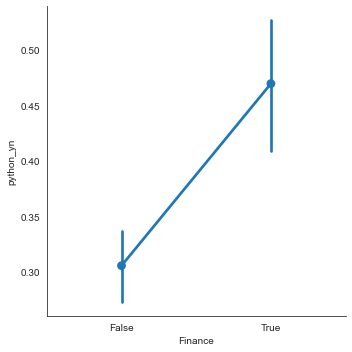

In [34]:
f, axarr = plt.subplots(3, 4, figsize=(14, 8))
f.subplots_adjust(hspace=1)

sns.factorplot(x='Finance', y='python_yn', data=temp.dropna(), ax=axarr[0][0])
axarr[0][0].set_title("Finance?")

Text(0.5, 1.0, 'Information Technology?')

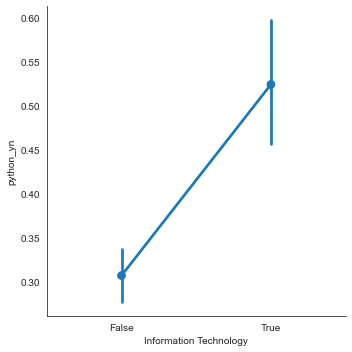

In [35]:
sns.factorplot(x='Information Technology', y='python_yn', 
               data=temp.dropna(), ax=axarr[0][1])
axarr[0][1].set_title("Information Technology?")


Text(0.5, 1.0, 'Government & Public Administration?')

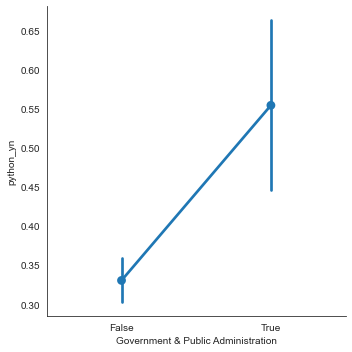

In [36]:
sns.factorplot(x='Government & Public Administration', y='python_yn', 
               data=temp.dropna(), ax=axarr[0][2])
axarr[0][2].set_title("Government & Public Administration?")


Text(0.5, 1.0, 'Education?')

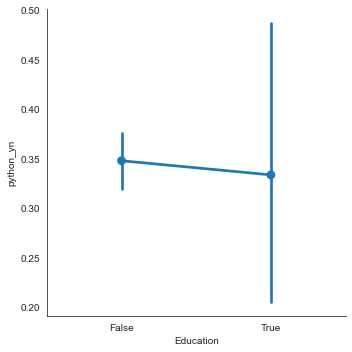

In [37]:
sns.factorplot(x='Education', y='python_yn', 
               data=temp.dropna(), ax=axarr[0][3])
axarr[0][3].set_title("Education?")


Text(0.5, 1.0, 'Management & Consulting?')

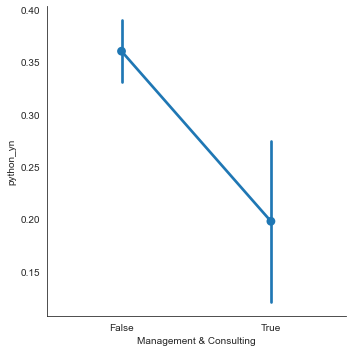

In [38]:
sns.factorplot(x='Management & Consulting', y='python_yn', 
               data=temp.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Management & Consulting?")

Text(0.5, 1.0, 'Pharmaceutical & Biotechnology?')

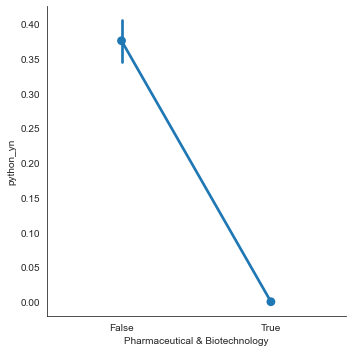

In [39]:
sns.factorplot(x='Pharmaceutical & Biotechnology', y='python_yn', 
               data=temp.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Pharmaceutical & Biotechnology?")

Text(0.5, 1.0, 'Manufacturing?')

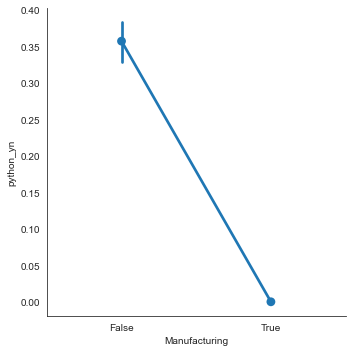

In [40]:
sns.factorplot(x='Manufacturing', y='python_yn', 
               data=temp.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Manufacturing?")

Text(0.5, 1.0, 'Human Resources & Staffing?')

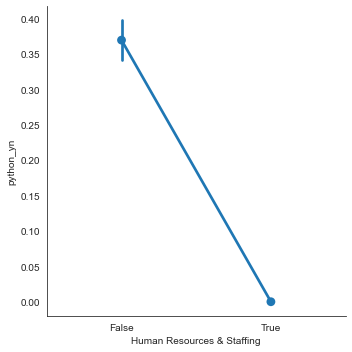

In [41]:
sns.factorplot(x='Human Resources & Staffing', y='python_yn', 
               data=temp.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Human Resources & Staffing?")

Text(0.5, 1.0, 'Media & Communication?')

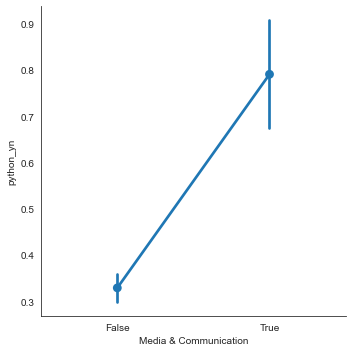

In [42]:
sns.factorplot(x='Media & Communication', y='python_yn', 
               data=temp.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Media & Communication?")

Text(0.5, 1.0, 'Retail & Wholesale?')

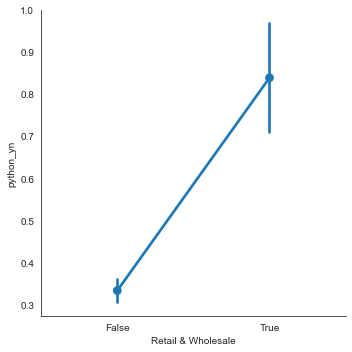

In [43]:
sns.factorplot(x='Retail & Wholesale', y='python_yn', 
               data=temp.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Retail & Wholesale?")

Text(0.5, 1.0, 'Healthcare?')

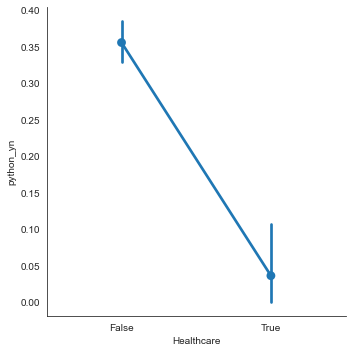

In [44]:
sns.factorplot(x='Healthcare', y='python_yn', 
               data=temp.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Healthcare?")

**Multivariate Analysis**

In [45]:
# Bring only the nuemric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_column_names = df.select_dtypes(include=numerics).columns
print(numeric_column_names, '\n')

Index(['Estimate Base Salary', 'Low Estimate', 'High Estimate', 'Founded',
       'Rating', 'Friend Reccomendation', 'CEO Approval', 'Number of Rater',
       'Career Opportinities', 'Compensation and Benefits',
       'Culture and Values', 'Senior Management', 'Work Life Balance',
       'python_yn', 'r_yn', 'sql_yn', 'java_yn', 'julia_yn', 'scala_yn',
       'c_yn', 'c++_yn', 'javascript_yn', 'spark_yn', 'hadoop_yn', 'matlab_yn',
       'sas_yn', 'git_yn', 'excel_yn', 'nosql_yn', 'aws_yn', 'mongodb_yn',
       'cassandra_yn', 'hive_yn', 'bigml_yn', 'tableau_yn', 'powerbi_yn',
       'nlp_yn', 'pytorch_yn', 'tensorflow_yn', 'mathematic_yn',
       'statistic_yn'],
      dtype='object') 



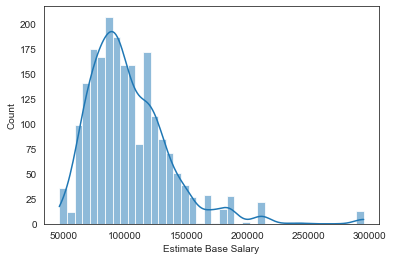

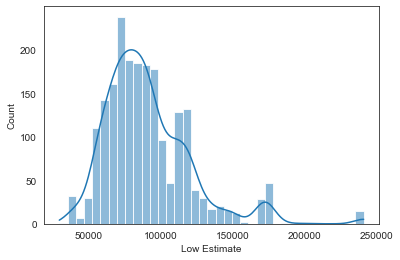

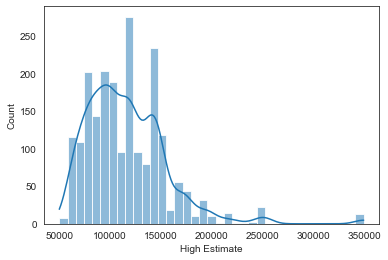

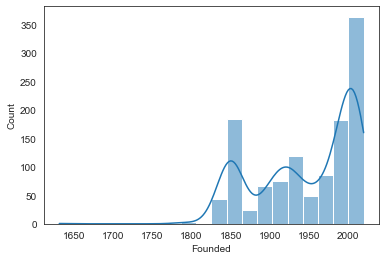

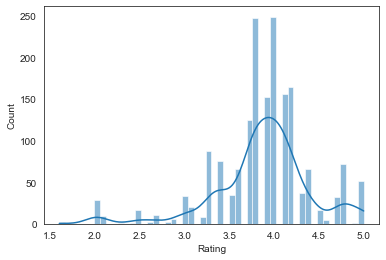

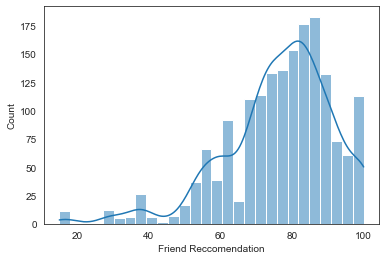

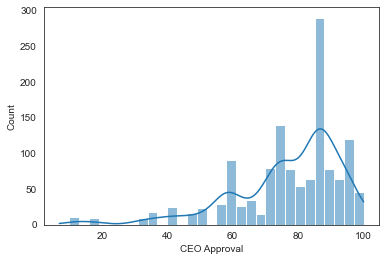

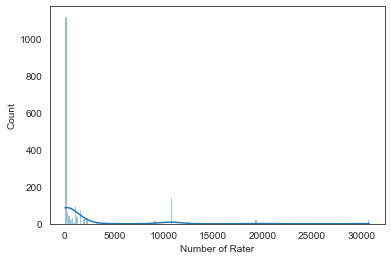

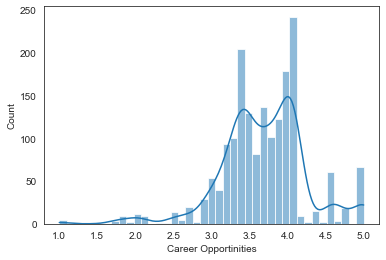

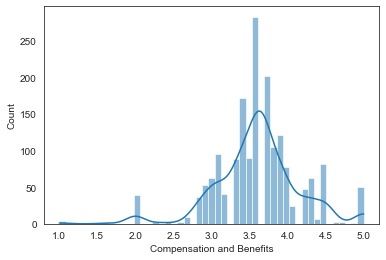

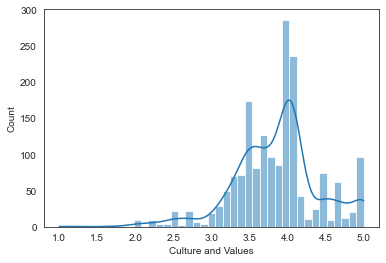

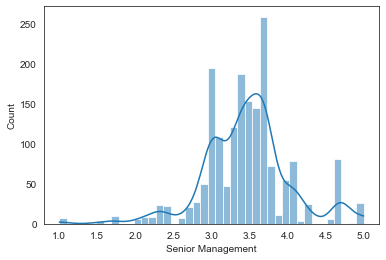

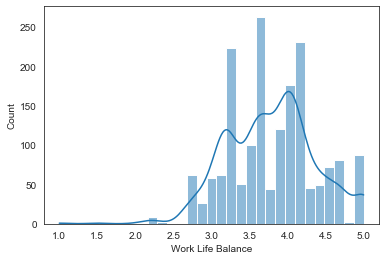

In [46]:
# Ignore the columns that have '_yn'
numeric_column_names = numeric_column_names.map(lambda x: x if '_yn' not in x else None ).dropna()

#Show a histplot of all the numeric columns
for column in numeric_column_names:
    ax = sns.histplot(data=df, x=column, kde=True)
    plt.show()

In [47]:
sns.set(font_scale=1.15)
plt.figure(figsize=(30,10))
sns.pairplot(df)

<Figure size 2160x720 with 0 Axes>

In [ ]:
sns.pairplot(
    data=df, 
    aspect=.85);

In [ ]:
df.corr()

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(30,10))
sns.heatmap(
    df.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

In [ ]:
sns.set(font_scale=1.3)
sns.scatterplot(
    x='Low Estimate', 
    y='High Estimate', 
    data=df)
plt.xlabel(
    'Low Estimate')
plt.ylabel(
    'High Estimate')

In [ ]:
sns.regplot(
    x='Low Estimate', 
    y='High Estimate', 
    data=df)
plt.xlabel(
    'Low Estimate')
plt.ylabel(
    'High Estimate')

In [ ]:
sns.scatterplot(
    x='Low Estimate',
    y='High Estimate', 
    data=df,
    palette='bright');

In [ ]:
sns.relplot(
    x='Low Estimate', 
    y='High Estimate', 
    data=df, 
    palette='bright',
    kind='scatter');

In [ ]:
sns.relplot(
    x='Low Estimate', 
    y='High Estimate', 
    data=df, 
    palette='bright',
    kind='scatter');

In [ ]:
sns.relplot(
    x='Founded', 
    y='Rating', 
    data=df,
    palette='bright',
    height=3, aspect=1.3,
    kind='scatter');

In [ ]:
sns.lmplot(
    x="Founded", 
    y="Rating", 
    data=df,
    palette='bright');

In [ ]:
sns.lineplot(
    x="Founded", 
    y="Rating",
    data=df)

In [ ]:
sns.lineplot(
    x="Founded", 
    y="Rating",
    data=df,
    palette='bright');

In [ ]:
sns.jointplot(
    x='Founded', 
    y='Rating', 
    data=df);

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(30,10))
sns.barplot(
    x='Low Estimate', 
    y='High Estimate', 
    data=df, 
    color='blue')

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(30,10))
sns.barplot(
    x='Founded', 
    y='Rating', 
    data=df, 
    palette='bright');

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(30,10))
sns.catplot(
    x='Founded', 
    y='Rating',
    data=df,
    palette='bright',
    kind='bar')

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(30,10))
sns.boxplot(
    x='Founded', 
    y='Rating', 
    data=df, 
    color='blue')
plt.xticks(rotation=45, 
           ha='right');

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(30,10))
sns.catplot(
    x='Founded', 
    y='Rating',
    data=df,
    palette='bright')

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(40,10))
sns.violinplot(
    x='Low Estimate', 
    y='High Estimate', 
    data=df, 
    color='blue');

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(40,10))
g = sns.catplot(
        x='Founded', 
        y='Rating', 
        data=df,
        palette='bright',
        height=3,
        aspect=2 )
g.set_xticklabels(
        rotation=45, 
        ha='right')